# Weekend Challenge

In [1]:
from OFDM import *

Read data file

In [2]:
received_data = pd.read_csv("gr5file.csv", header=None, delimiter=r"\s+")
received_data = received_data.values[0]

Read channel file

In [3]:
channel_data = pd.read_csv("gr5channel.csv", header=None, delimiter=r"\s+")
channel_data = channel_data.values[0]

Setup OFDM with given DFT size, CP and modulation

In [4]:
wc = CamG(1024, 32, "QPSK")

Channel Data

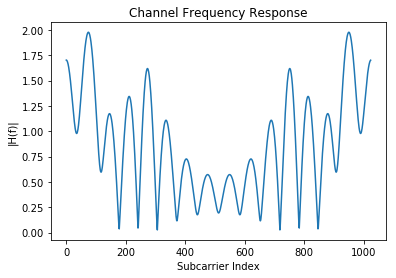

In [5]:
H = FFT(channel_data, wc.K)

plt.plot(wc.all_carriers, abs(H))
plt.title("Channel Frequency Response")
plt.xlabel("Subcarrier Index")
plt.ylabel("|H(f)|")

Remove cyclic Prefix

In [6]:
received_no_cp = wc.remove_cp(received_data)

Compute DFT and equalise using channel coefficients

In [27]:
OFDM_demod = FFT(received_no_cp)
equalised_OFDM = equalise(OFDM_demod, H)
print(len(equalised_OFDM))

1024


Demap the data using the min dist decision rule

In [24]:
data_P, decisions = wc.demap(equalised_OFDM)

Convert parallel data to serial bit stream

In [25]:
data = wc.PS(data_P)

In [28]:
data = data[]

2048